In [2]:
import numpy as np

In [6]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [8]:
def f_xy(x, y): 
    if 1 <= y <=6 and 1 <= x - y <=6:
        return y * (x - y) / 441
    else: 
        return 0 

In [9]:
XY = [x_set, y_set, f_xy]

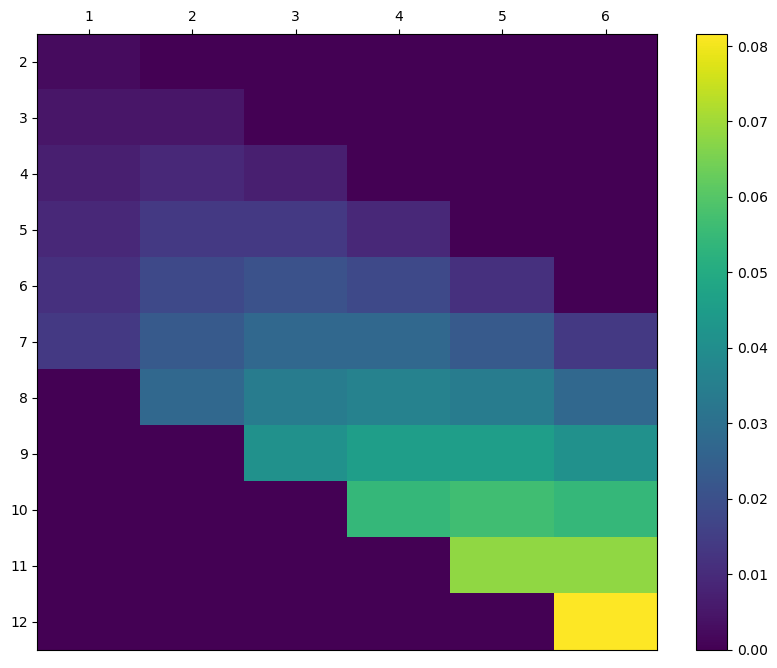

In [14]:
import matplotlib.pyplot as plt
prob = np.array([[f_xy(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)
ax.set_xticklabels(np.arange(1, 7), minor = False)
ax.set_yticklabels(np.arange(2, 13), minor = False) 
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
#x축의 눈금을 그래프 위쪽에 표시 
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [15]:
np.all(prob >= 0)

np.True_

In [16]:
np.sum(prob)

np.float64(1.0)

In [25]:
def f_X(x): 
    return np.sum([f_xy(x, y_k) for y_k in y_set])

In [26]:
def f_Y(y):
    return np.sum([f_xy(x_k, y) for x_k in x_set])

In [27]:
X = [x_set, f_X]
Y = [y_set, f_Y]

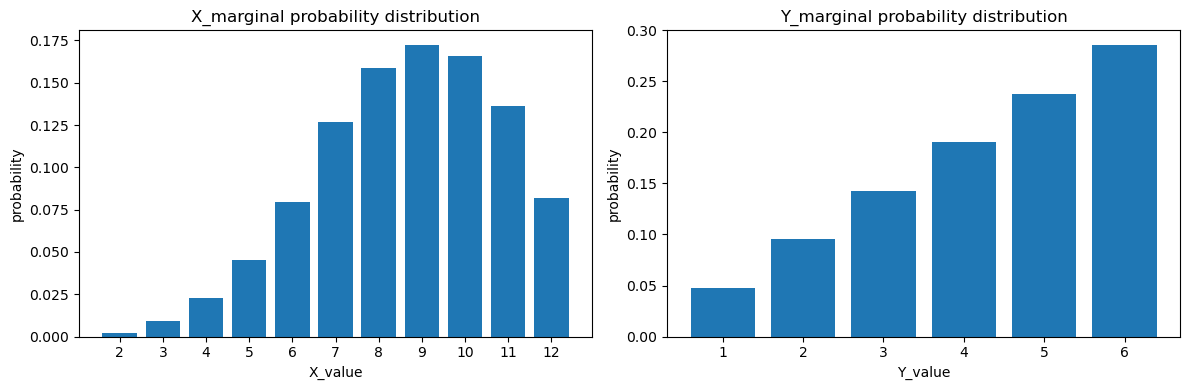

In [28]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')
ax2.set_xticks(y_set)        

plt.tight_layout()            
plt.show()

In [33]:
np.set_printoptions(precision=3)

In [36]:
x = np.sum([x_i * f_xy(x_i, y_j) for x_i in x_set for y_j in y_set])
print(round(x, 3))

8.667


In [41]:
def E(XY, g): 
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [43]:
mean_X = E((x_set, y_set, f_xy), lambda x, y: x)
mean_X
print(round(x, 3))

8.667


In [46]:
mean_Y = E(XY, lambda x, y: y)
print(round(mean_Y, 3))

4.333


In [47]:
a, b = 2, 3

In [48]:
E(XY, lambda x, y: a*x + b*y)

np.float64(30.333333333333332)

In [49]:
a * mean_X + b * mean_Y

np.float64(30.333333333333332)

In [50]:
np.sum([(x_i-mean_X)**2 * f_xy(x_i, y_j)
        for x_i in x_set for y_j in y_set])

np.float64(4.444444444444444)

In [51]:
def V(xy, g):
    x_set, y_set, f_xy = xy
    mean = E(xy, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_xy(x_i, y_j)
    for x_i in x_set for y_j in y_set])

In [53]:
var_X = V(XY, g=lambda x, y: x)
var_Y = V(XY, g=lambda x, y: y)

print(round(var_X, 3))
print(round(var_Y, 3))


4.444
2.222


In [59]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return E(XY, lambda x, y: (x - mean_X) * (y - mean_Y))

In [60]:
XY = (x_set, y_set, f_xy)

cov_xy = Cov(XY)
print(round(cov_xy, 3))

2.222


In [61]:
V(XY, lambda x, y: a*x + b*y)

np.float64(64.44444444444444)

In [62]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

np.float64(64.44444444444443)

In [63]:
cov_xy / np.sqrt(var_X * var_Y)

np.float64(0.7071067811865474)